In [428]:
with open("input.txt") as file:
    rockscans = file.read().split("\n")

In [357]:
rockscans = """498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9""".split("\n")

In [429]:
rockscans = [scan.split(' -> ') for scan in rockscans]
rockscans = [[coord.split(',') for coord in scan] for scan in rockscans]

In [430]:
import numpy as np

In [431]:
rockscans_int = []
min_x = 999
max_x = 0
min_y = 999
max_y = 0
for scanline in rockscans:
    scanline_int = []
    for coordscan in scanline:
        coordscans_int = []
        for coord in coordscan:
            coordscans_int.append(int(coord))
        if coordscans_int[0] < min_x:
            min_x = coordscans_int[0]
        if coordscans_int[0] > max_x:
            max_x = coordscans_int[0]
        if coordscans_int[1] < min_y:
            min_y = coordscans_int[1]
        if coordscans_int[1] > max_y:
            max_y = coordscans_int[1]
        scanline_int.append(coordscans_int[::-1])
    rockscans_int.append(scanline_int)

In [384]:
(min_x, max_x, min_y, max_y)

(483, 537, 13, 165)

In [385]:
(max_x-min_x, max_y-min_y)

(54, 152)

In [386]:
cave = np.zeros((max_y + 10, max_x - min_x + 3))

In [387]:
cave.shape

(175, 57)

In [388]:
for scans in rockscans_int:
    scanlength = len(scans)
    for i in range(scanlength - 1):
        rock_coordinates_start = scans[i]
        rock_coordinates_stop = scans[i + 1]
        if rock_coordinates_start[0] == rock_coordinates_stop[0]:
            for j in range(abs(rock_coordinates_stop[1] - rock_coordinates_start[1])+1):
                if rock_coordinates_start[1] > rock_coordinates_stop[1]:
                    cave[
                        (
                            rock_coordinates_start[0],
                            rock_coordinates_start[1] - j - min_x +1,
                        )
                    ] = 999
                else:
                    cave[
                        (
                            rock_coordinates_start[0],
                            rock_coordinates_start[1] + j - min_x +1,
                        )
                    ] = 999
        if rock_coordinates_start[1] == rock_coordinates_stop[1]:
            for j in range(abs(rock_coordinates_stop[0] - rock_coordinates_start[0]) +1):
                if rock_coordinates_start[0] > rock_coordinates_stop[0]:
                    cave[
                        (
                            rock_coordinates_start[0] - j,
                            rock_coordinates_start[1] - min_x +1,
                        )
                    ] = 999
                else:
                    cave[
                        (
                            rock_coordinates_start[0] + j,
                            rock_coordinates_start[1] - min_x +1,
                        )
                    ] = 999


In [367]:
rock_coordinates_start[0]

52

In [389]:
cave[(0, 500-min_x + 1)] = -999

In [390]:
import matplotlib.pyplot as plt

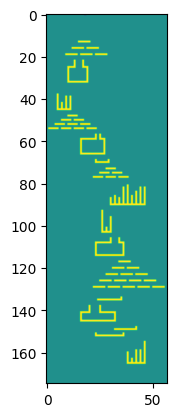

In [391]:
plt.imshow(cave)

In [392]:
sand_spawner = (np.where(cave==-999)[0][0], np.where(cave==-999)[1][0]) 

In [393]:
sand_spawner

(0, 18)

In [432]:
def move_sand(cave, sand_position):
    not_hit = True
    while not_hit:
        if sand_position[1] <= 0 and sand_position[1] >= (max_x - min_x +2):
            not_hit = False
            end_of_grid = True
        elif sand_position[0] >= max_y +5:
            not_hit = False
            end_of_grid = True
        else:
            # try to move down
            if cave[(sand_position[0] + 1, sand_position[1])] ==0:
                sand_position = (sand_position[0] + 1, sand_position[1])
                not_hit = True
            # try move to left
            elif cave[(sand_position[0] + 1, sand_position[1] -1 )] ==0:
                sand_position = (sand_position[0] + 1, sand_position[1] -1)
                not_hit = True
            # try move to right
            elif cave[(sand_position[0] + 1, sand_position[1] +1 )] ==0:
                sand_position = (sand_position[0] + 1, sand_position[1] +1)
                not_hit = True
            else:
                not_hit = False
                end_of_grid = False
    return sand_position, end_of_grid

In [395]:
reached_end = False
iterations = 0
while not reached_end and iterations <= 10000:
    new_sand_position, end_of_grid = move_sand(cave, sand_spawner)
    iterations += 1
    reached_end = end_of_grid
    if reached_end:
        break
    cave[new_sand_position] = -999

In [396]:
np.where(cave==-999)[0].shape[0] -1

655

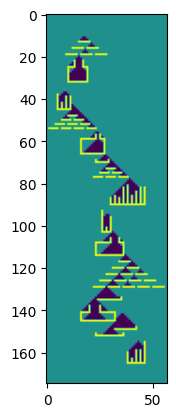

In [397]:
plt.imshow(cave)

## Part 2 Add a bottom

In [433]:
min_x = min_x // 2
max_x = max_x * 2


In [434]:
cave = np.zeros((max_y + 4, max_x - min_x + 3))

In [435]:
for scans in rockscans_int:
    scanlength = len(scans)
    for i in range(scanlength - 1):
        rock_coordinates_start = scans[i]
        rock_coordinates_stop = scans[i + 1]
        if rock_coordinates_start[0] == rock_coordinates_stop[0]:
            for j in range(abs(rock_coordinates_stop[1] - rock_coordinates_start[1])+1):
                if rock_coordinates_start[1] > rock_coordinates_stop[1]:
                    cave[
                        (
                            rock_coordinates_start[0],
                            rock_coordinates_start[1] - j - min_x +1,
                        )
                    ] = 999
                else:
                    cave[
                        (
                            rock_coordinates_start[0],
                            rock_coordinates_start[1] + j - min_x +1,
                        )
                    ] = 999
        if rock_coordinates_start[1] == rock_coordinates_stop[1]:
            for j in range(abs(rock_coordinates_stop[0] - rock_coordinates_start[0]) +1):
                if rock_coordinates_start[0] > rock_coordinates_stop[0]:
                    cave[
                        (
                            rock_coordinates_start[0] - j,
                            rock_coordinates_start[1] - min_x +1,
                        )
                    ] = 999
                else:
                    cave[
                        (
                            rock_coordinates_start[0] + j,
                            rock_coordinates_start[1] - min_x +1,
                        )
                    ] = 999

In [436]:
for i in range(cave.shape[1]):
    cave[(max_y + 2, i)] = 999

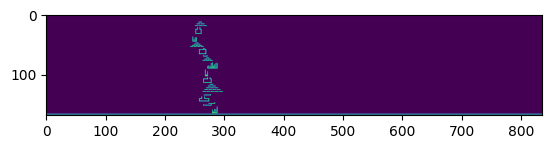

In [437]:
plt.imshow(cave)

In [438]:
# add sand spawner
cave[(0, 500-min_x + 1)] = -999
sand_spawner = (np.where(cave==-999)[0][0], np.where(cave==-999)[1][0]) 

In [439]:
reached_end = False
iterations = 0
while not reached_end and iterations <= 1000000:
    new_sand_position, end_of_grid = move_sand(cave, sand_spawner)
    iterations += 1
    reached_end = end_of_grid
    if reached_end:
        break
    cave[new_sand_position] = -999
np.where(cave==-999)[0].shape[0]

26484

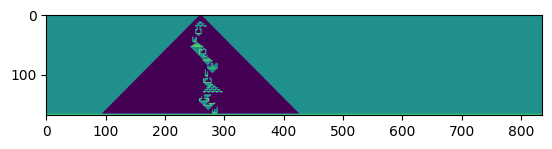

In [440]:
plt.imshow(cave)